In [1]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('NSW-Table 1 2 3.csv')

# Rename the columns for easier manipulation
data.columns = ['Year', 'Crash_Count', 'Month']

# Combine year and month into a single datetime column
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(Day=1))

# Set the datetime column as the index
data.set_index('Date', inplace=True)

# Drop the now redundant 'Year' and 'Month' columns
data.drop(columns=['Year', 'Month'], inplace=True)

# Split the data into training and testing sets


In [2]:
data.head()

,Crash_Count
Date,
1989-01-01,55
1989-02-01,82
1989-03-01,82
1989-04-01,45
1989-05-01,77


/Users/amin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/amin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/amin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/amin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


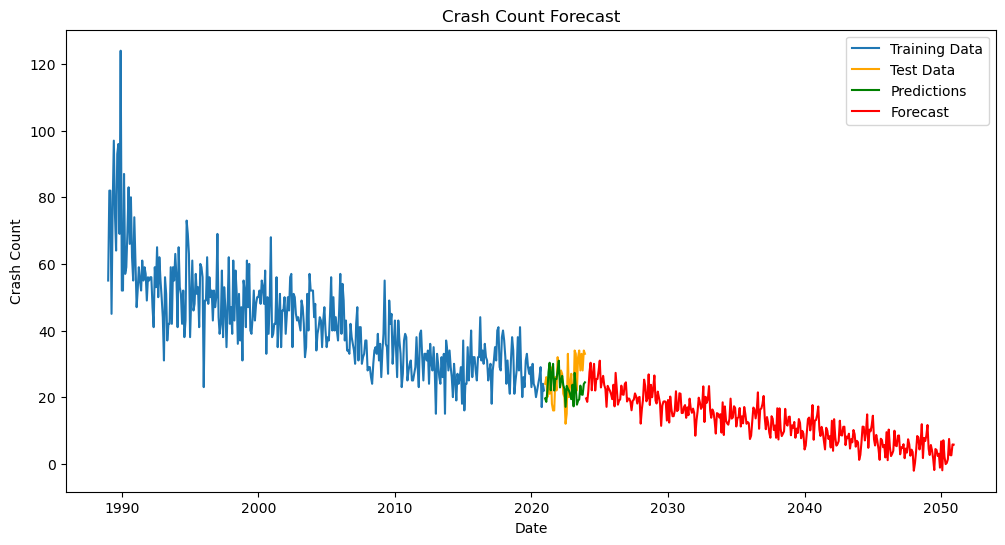

2024-01-01    19.598706
2024-02-01    18.571110
2024-03-01    21.779227
2024-04-01    27.473559
2024-05-01    30.316589
2024-06-01    22.052464
2024-07-01    27.080682
2024-08-01    29.979772
2024-09-01    21.985301
2024-10-01    25.454058
2024-11-01    25.437266
2024-12-01    27.936170
Freq: MS, Name: mean, dtype: float64


In [8]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('NSW-Table 1 2 3.csv')

# Rename the columns for easier manipulation
data.columns = ['Year', 'Crash_Count', 'Month']

# Combine year and month into a single datetime column
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(Day=1))

# Set the datetime column as the index
data.set_index('Date', inplace=True)

# Drop the now redundant 'Year' and 'Month' columns
data.drop(columns=['Year', 'Month'], inplace=True)

# Split the data into train and test sets
train = data[:'2020']
test = data['2021':'2023']

# Fit the SARIMA model
seasonal_order = (5, 1, 0, 48)  # Adjust seasonal parameters as needed
model = SARIMAX(train, order=(2, 0, 1), seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)

# Make predictions for the test set
start = len(train)
end = len(train) + len(test) - 1
predictions = model_fit.predict(start=start, end=end, typ='levels')

# Forecast future values
future_steps = 12 * (2050 - 2023)  # Monthly steps from 2023 to 2050
forecast_index = pd.date_range(test.index[-1], periods=future_steps + 1, freq='MS')[1:]
forecast = model_fit.get_forecast(steps=future_steps)
forecast_df = forecast.summary_frame()['mean']
forecast_df.index = forecast_index

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data', color='orange')
plt.plot(predictions, label='Predictions', color='green')
plt.plot(forecast_df, label='Forecast', color='red')
plt.title('Crash Count Forecast')
plt.xlabel('Date')
plt.ylabel('Crash Count')
plt.legend()
plt.show()

# Extract and print the forecast for 2024
forecast_2024 = forecast_df['2024']
print(forecast_2024)


/Users/amin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/amin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


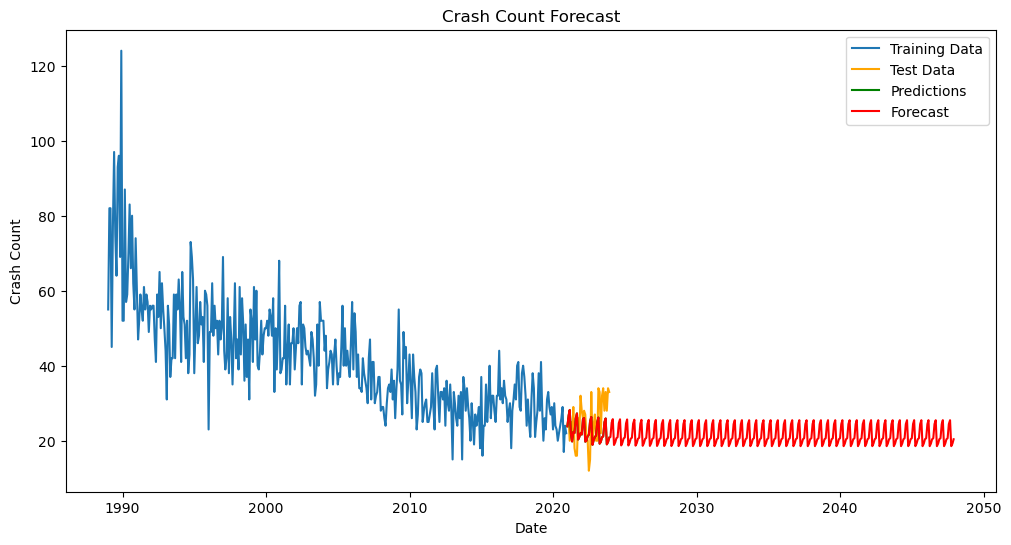

In [10]:
train = data[:'2020']
test = data['2021':'2023']

# Fit the ARIMA model
#seasonal_order = (2, 1, 0, 24)  # Example of seasonal parameters, adjust as needed

seasonal_order = (4, 1, 0, 6)  # Example of seasonal parameters, adjust as needed

model = SARIMAX(train, order=(2, 0, 1), seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)
# Make predictions
start = len(train)
end = len(train) + len(test) - 1
predictions = model_fit.predict(start=start, end=end, typ='levels')

# Forecast future values
future_steps = 12 * (2050 - 2023) # Monthly steps from 2023 to 2050
forecast = model_fit.forecast(steps=future_steps)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data', color='orange')
plt.plot(predictions, label='Predictions', color='green')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Crash Count Forecast')
plt.xlabel('Date')
plt.ylabel('Crash Count')
plt.legend()
plt.show()


In [13]:
forecast_2024 = forecast_df['2024']
print(forecast_2024)

NameError: name 'forecast_df' is not defined

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2986.642, Time=1.00 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3241.900, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3125.552, Time=0.16 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2986.465, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3239.909, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2993.167, Time=0.06 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2985.348, Time=0.38 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2986.088, Time=0.15 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=2985.769, Time=2.08 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=2985.567, Time=1.42 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=2988.308, Time=0.61 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=2987.922, Time=0.55 sec
 ARIMA(0,1,1)(2,0,2)[12] intercept   : AIC=2987.129, Time=2.00 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=3234.045, Time=0.14 sec
 ARIMA(1,1,1)(1,0,1

/Users/amin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/amin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


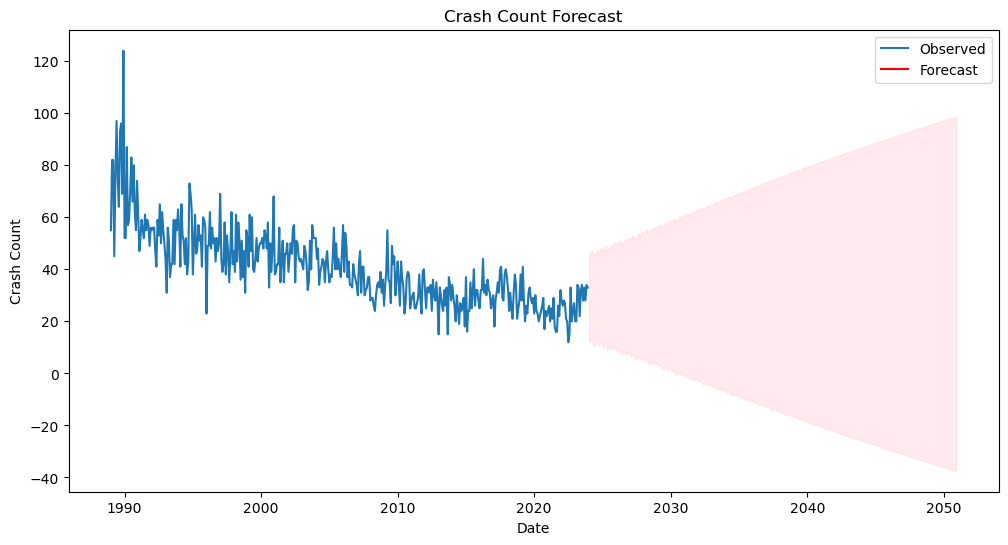

In [1]:
import pandas as pd
import numpy as np
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('NSW-Table 1 2 3.csv')

# Rename the columns for easier manipulation
data.columns = ['Year', 'Crash_Count', 'Month']

# Combine year and month into a single datetime column
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(Day=1))

# Set the datetime column as the index
data.set_index('Date', inplace=True)

# Drop the now redundant 'Year' and 'Month' columns
data.drop(columns=['Year', 'Month'], inplace=True)

# Using pmdarima to find the best SARIMA parameters
model = pm.auto_arima(data, seasonal=True, m=12,
                      stepwise=True, trace=True,
                      error_action='ignore', suppress_warnings=True)

# Print the best model summary
print(model.summary())

# Fit the SARIMA model with the best parameters
best_order = model.order
best_seasonal_order = model.seasonal_order
sarima_model = SARIMAX(data, order=best_order, seasonal_order=best_seasonal_order)
sarima_fit = sarima_model.fit(disp=False)

# Forecast future values
future_steps = 12 * (2050 - 2023)  # Monthly steps from 2023 to 2050
forecast = sarima_fit.get_forecast(steps=future_steps)
forecast_index = pd.date_range(data.index[-1], periods=future_steps + 1, freq='MS')[1:]
forecast_df = pd.DataFrame(forecast.predicted_mean, index=forecast_index, columns=['Forecast'])

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data, label='Observed')
plt.plot(forecast_df, label='Forecast', color='red')
plt.fill_between(forecast_df.index, 
                 forecast.conf_int().iloc[:, 0], 
                 forecast.conf_int().iloc[:, 1], 
                 color='pink', alpha=0.3)
plt.title('Crash Count Forecast')
plt.xlabel('Date')
plt.ylabel('Crash Count')
plt.legend()
plt.show()
